In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score,fbeta_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier


from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
df.columns = [c.replace(' ','_') for c in df.columns]
df.columns = [c.replace(',','') for c in df.columns]
df.columns = [c.replace('/','_') for c in df.columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.corr(method='kendall')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.185197,0.484271,0.155029,0.176043,-0.119301,-0.056879,0.457461,-0.527832,0.141343,-0.048870,0.087966
volatile_acidity,-0.185197,1.000000,-0.428354,0.022407,0.109608,0.012573,0.063701,0.015913,0.158746,-0.228888,-0.151839,-0.300779
citric_acid,0.484271,-0.428354,1.000000,0.123007,0.076729,-0.049804,0.011645,0.245729,-0.389752,0.226669,0.064004,0.167318
residual_sugar,0.155029,0.022407,0.123007,1.000000,0.152415,0.052682,0.102265,0.295986,-0.063127,0.026959,0.081206,0.025744
chlorides,0.176043,0.109608,0.076729,0.152415,1.000000,0.000439,0.091610,0.287866,-0.162706,0.014227,-0.197176,-0.148919
free_sulfur_dioxide,-0.119301,0.012573,-0.049804,0.052682,0.000439,1.000000,0.606908,-0.028972,0.079300,0.031706,-0.056019,-0.045646
total_sulfur_dioxide,-0.056879,0.063701,0.011645,0.102265,0.091610,0.606908,1.000000,0.087719,-0.006798,-0.000194,-0.179212,-0.156612
density,0.457461,0.015913,0.245729,0.295986,0.287866,-0.028972,0.087719,1.000000,-0.217228,0.110191,-0.329754,-0.136611
pH,-0.527832,0.158746,-0.389752,-0.063127,-0.162706,0.079300,-0.006798,-0.217228,1.000000,-0.053568,0.125311,-0.034235
sulphates,0.141343,-0.228888,0.226669,0.026959,0.014227,0.031706,-0.000194,0.110191,-0.053568,1.000000,0.143745,0.299270


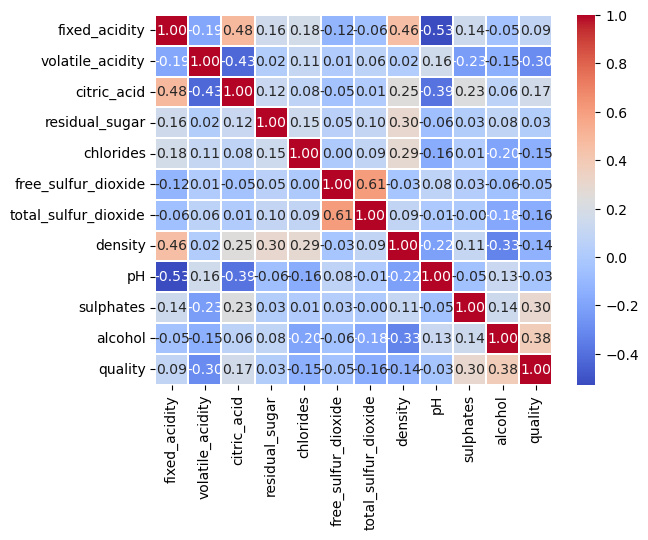

In [7]:
sns.heatmap(df.corr(method='kendall'), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.show()

In [8]:
x = df.drop('quality',axis=1)
y = df.quality

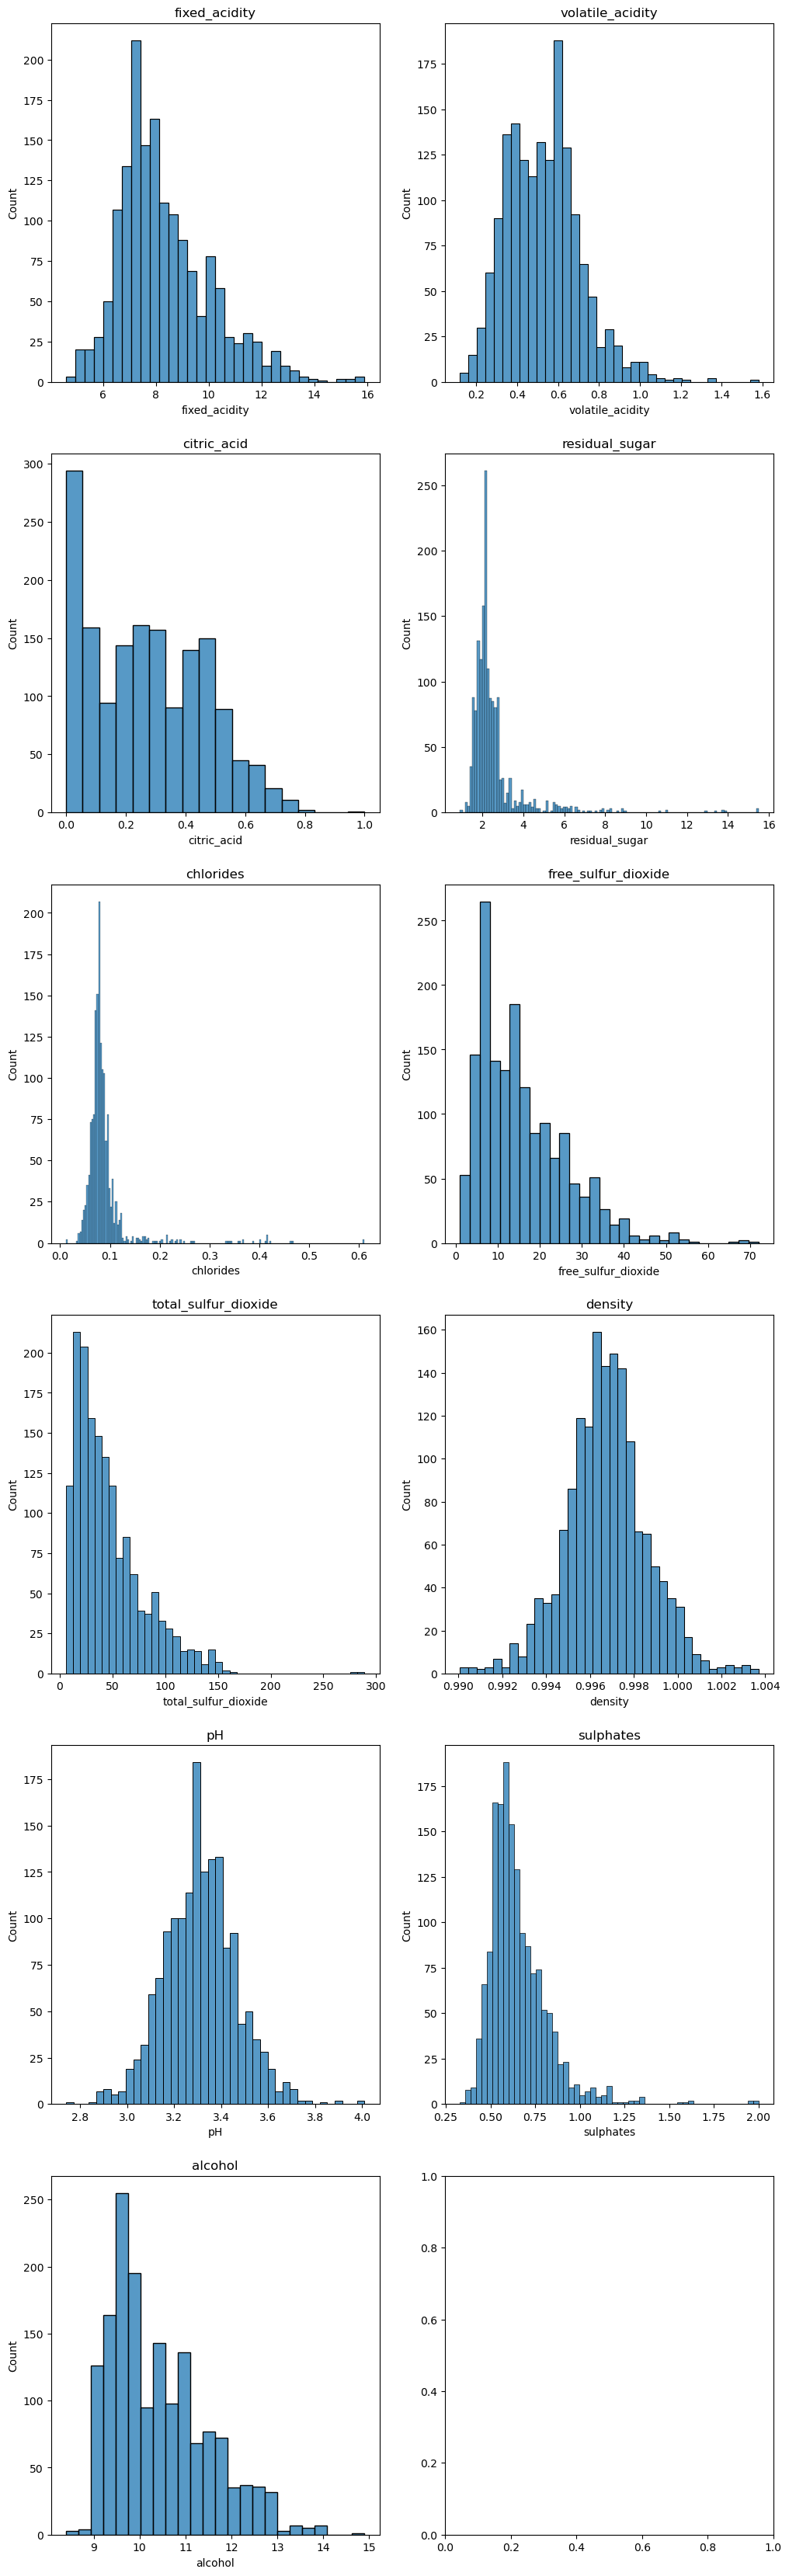

In [9]:
fig,ax = plt.subplots(6,2,figsize=(12,42))
column = x.columns

for col,axes in zip(column,ax.ravel()):
    sns.histplot(x[col],ax=axes).set(title=col)

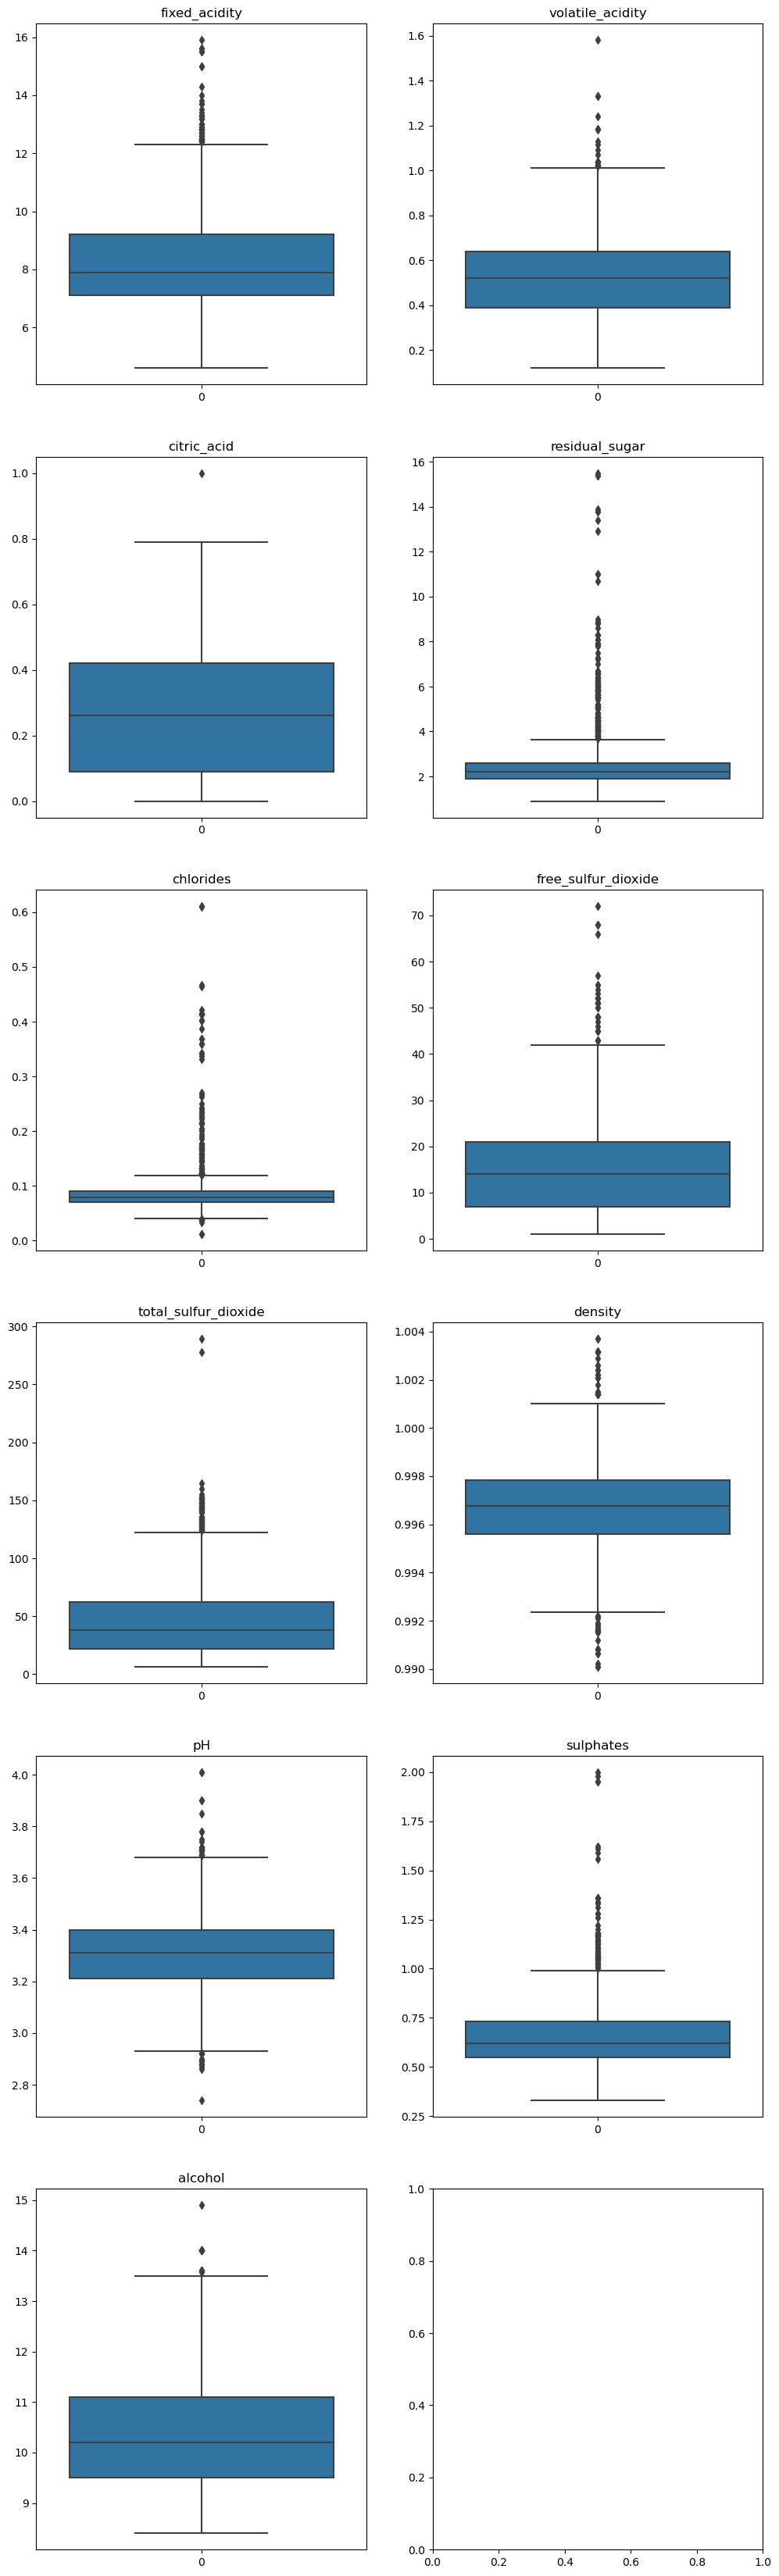

In [10]:
fig,ax = plt.subplots(6,2,figsize=(12,42))
column = x.columns

for col,axes in zip(column,ax.ravel()):
    sns.boxplot(x[col],ax=axes).set(title=col)

In [11]:
column = df.columns

for element in column:
    print('Процентное количество выбросов (считая те, которые лежат на границе):',element,
          df[element][df[element] >= df[element].describe()['75%']+1.5*(df[element].describe()['75%']-df[element].describe()['25%'])].count()*100/df.shape[0],'%')

Процентное количество выбросов (считая те, которые лежат на границе): fixed_acidity 3.0644152595372107 %
Процентное количество выбросов (считая те, которые лежат на границе): volatile_acidity 1.1882426516572857 %
Процентное количество выбросов (считая те, которые лежат на границе): citric_acid 0.06253908692933083 %
Процентное количество выбросов (считая те, которые лежат на границе): residual_sugar 9.693558474046279 %
Процентное количество выбросов (считая те, которые лежат на границе): chlorides 6.441525953721076 %
Процентное количество выбросов (считая те, которые лежат на границе): free_sulfur_dioxide 2.0637898686679175 %
Процентное количество выбросов (считая те, которые лежат на границе): total_sulfur_dioxide 3.627267041901188 %
Процентное количество выбросов (считая те, которые лежат на границе): density 1.5009380863039399 %
Процентное количество выбросов (считая те, которые лежат на границе): pH 1.3133208255159474 %
Процентное количество выбросов (считая те, которые лежат на гра

Заключение по разделу: 
1. Целевая переменная дискретна, следовательно, используем в качестве моделей классификаторы
2. Распределение данных +- нормальное, выбросы незначительны. Преобразование данных может повлечь негативные последствия, так как после стандартизации часть переменных со значениями 0, станут отрицательными, что невозможно априори. Как итог, наши сырые данные вполне готовы к работе. 
3. Большая часть переменных почти не связаны с целевой переменной (r<0.2 для большинства)

Для анализа целевой переменной создадим датасет, состоящий из метрик качества классификации, а именно accuracy,recall,precision,f1_score,fbeta_score(alpha=0.25) и для полноты посчитаем MAE. Также создадим идентичный датасет, состоящий из тех же метрик, но которые будуем завёрнуты в параметр scoring функции cross_val_score, чтобы на основе усреднения метрик по нескольким фолдам получить более качественную оценку. 

<Axes: xlabel='quality', ylabel='Count'>

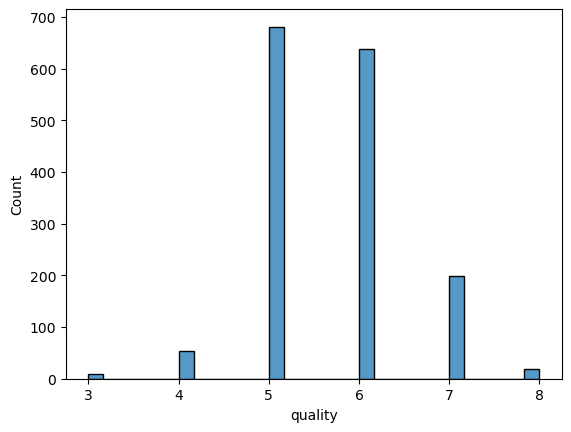

In [12]:
sns.histplot(df.quality)

Как можно заметить, структура классов неодинаковая, как например в задаче mnist, следовательно, будем брать macro усреднение

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
accuracy=[]
precision=[]
recall=[]
f1=[]
Fb=[]
mae=[]


rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    accuracy.append(accuracy_score(clf.fit(x_train,y_train).predict(x_test),y_test))
    precision.append(precision_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    recall.append(recall_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    f1.append(f1_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    Fb.append(fbeta_score(clf.fit(x_train,y_train).predict(x_test),y_test,beta=0.05,average='macro'))
    mae.append(mean_absolute_error(clf.fit(x_train,y_train).predict(x_test),y_test))

model = ['Random_Forest','Extra_Tree','K_neighbors','SVC','Ridge']
data_class_1 = pd.DataFrame({'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1,'Fb':Fb,'mae':mae},index=model)
data_class_1

C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall i

,accuracy,precision,recall,f1,Fb,mae
Random_Forest,0.671875,0.331771,0.328824,0.325499,0.323624,0.359375
Extra_Tree,0.684375,0.331308,0.494741,0.332796,0.338135,0.340625
K_neighbors,0.456250,0.199464,0.207367,0.194672,0.199417,0.640625
SVC,0.509375,0.209796,0.343222,0.193260,0.209662,0.556250
Ridge,0.568750,0.231838,0.189080,0.207791,0.231700,0.462500


Попробуем улучшить метрики с помощью бэггинга. Путём такого усреднения мы сможем уменьшить дисперсию ошибок в n раз и избежать переобучения

Метрики на тесте

In [15]:
seed = 1075
np.random.seed(seed)
b_accuracy=[]
b_precision=[]
b_recall=[]
b_f1=[]
b_Fb=[]
b_mae=[]

for clf in clf_array:
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
    b_accuracy.append(accuracy_score(clf.fit(x_train,y_train).predict(x_test),y_test))
    b_precision.append(precision_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    b_recall.append(recall_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    b_f1.append(f1_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    b_Fb.append(fbeta_score(clf.fit(x_train,y_train).predict(x_test),y_test,beta=0.05,average='macro'))
    b_mae.append(mean_absolute_error(clf.fit(x_train,y_train).predict(x_test),y_test))
    
model_b = ['Random_Forest_bag','Extra_Tree_bag','K_neighbors_bag','SVC_bag','Ridge_bag']
data_metrics_bag_1 = pd.DataFrame({'accuracy':b_accuracy,'precision':b_precision,'recall':b_recall,'f1':b_f1,'Fb':b_Fb,'mae':b_mae},index=model_b)
data_metrics_bag_1

C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall i

,accuracy,precision,recall,f1,Fb,mae
Random_Forest_bag,0.656250,0.314694,0.334289,0.315295,0.325000,0.390625
Extra_Tree_bag,0.675000,0.338104,0.343884,0.363781,0.330026,0.343750
K_neighbors_bag,0.456250,0.199464,0.207367,0.194672,0.199417,0.640625
SVC_bag,0.509375,0.209796,0.343222,0.193260,0.209662,0.556250
Ridge_bag,0.568750,0.231838,0.189080,0.207791,0.231700,0.462500


Также применим методы бустинга, ещё один ансамблевый метод обучения, с целью улучшения метрик. В чего основе лежит противоположное бэггингу, последовательное обучение модели, которая в себя включает информацию об ошибках предыдущих моделей. 

In [16]:
accuracy_boostt=[]
precision_boostt=[]
recall_boostt=[]
f1_boostt=[]
Fb_boostt=[]
mae_boostt=[]


ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
clf_array = [ada_boost, grad_boost, xgb_boost, eclf]

y = y-3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

labels = ['Ada Boost', 'Grad Boost', 'XG Boost','Ensemble']
for clf in clf_array:
    accuracy_boostt.append(accuracy_score(clf.fit(x_train,y_train).predict(x_test),y_test))
    precision_boostt.append(precision_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    recall_boostt.append(recall_score(clf.fit(x_train,y_train).predict(x_test),y_test,average='macro'))
    f1_boostt.append(f1_score(clf.fit(x_train,y_train).predict(x_test),y_test,average ='macro'))
    Fb_boostt.append(fbeta_score(clf.fit(x_train,y_train).predict(x_test),y_test,beta=0.05,average='macro'))
    mae_boostt.append(mean_absolute_error(clf.fit(x_train,y_train).predict(x_test),y_test))
    
    
data_metrics_boost_1 = pd.DataFrame({'accuracy':accuracy_boostt,'precision':precision_boostt,'recall':recall_boostt,'f1':f1_boostt,'Fb':Fb_boostt,'mae':mae_boostt},index=labels)
data_metrics_boost_1

C:\PerfLogs\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

,accuracy,precision,recall,f1,Fb,mae
Ada Boost,0.528125,0.230886,0.340942,0.219812,0.230765,0.525000
Grad Boost,0.600000,0.306913,0.402910,0.331560,0.336832,0.443750
XG Boost,0.696875,0.345815,0.344761,0.344432,0.345804,0.334375
Ensemble,0.653125,0.317014,0.411277,0.356226,0.341667,0.368750


In [17]:
accuracy_cat=[]
precision_cat=[]
recall_cat=[]
f1_cat=[]
Fb_cat=[]
mae_cat=[]

ctb_clf = CatBoostClassifier()
cat_model = ctb_clf.fit(x_train,y_train)
label=['cat_boost']

accuracy_cat.append(accuracy_score(cat_model.predict(x_test),y_test))
precision_cat.append(precision_score(cat_model.predict(x_test),y_test,average='macro'))
recall_cat.append(recall_score(cat_model.predict(x_test),y_test,average='macro'))
f1_cat.append(f1_score(cat_model.predict(x_test),y_test,average ='macro'))
Fb_cat.append(fbeta_score(cat_model.predict(x_test),y_test,beta=0.05,average='macro'))
mae_cat.append(mean_absolute_error(cat_model.predict(x_test),y_test))
    
data_metrics_cboost = pd.DataFrame({'accuracy':accuracy_cat,'precision':precision_cat,'recall':recall_cat,'f1':f1_cat,'Fb':Fb_cat,'mae':mae_cat},index=label)
data_metrics_cboost


Learning rate set to 0.080126
0:	learn: 1.6851493	total: 166ms	remaining: 2m 45s
1:	learn: 1.5953148	total: 182ms	remaining: 1m 30s
2:	learn: 1.5193815	total: 192ms	remaining: 1m 3s
3:	learn: 1.4553213	total: 201ms	remaining: 50.1s
4:	learn: 1.3985261	total: 211ms	remaining: 42s
5:	learn: 1.3514836	total: 218ms	remaining: 36.1s
6:	learn: 1.3089836	total: 225ms	remaining: 31.9s
7:	learn: 1.2673724	total: 231ms	remaining: 28.7s
8:	learn: 1.2320554	total: 239ms	remaining: 26.3s
9:	learn: 1.1997153	total: 246ms	remaining: 24.4s
10:	learn: 1.1713798	total: 253ms	remaining: 22.8s
11:	learn: 1.1452718	total: 260ms	remaining: 21.4s
12:	learn: 1.1207955	total: 267ms	remaining: 20.2s
13:	learn: 1.1002743	total: 273ms	remaining: 19.2s
14:	learn: 1.0823151	total: 280ms	remaining: 18.4s
15:	learn: 1.0662088	total: 286ms	remaining: 17.6s
16:	learn: 1.0503680	total: 294ms	remaining: 17s
17:	learn: 1.0360846	total: 300ms	remaining: 16.3s
18:	learn: 1.0214021	total: 306ms	remaining: 15.8s
19:	learn: 1.

186:	learn: 0.5511951	total: 1.43s	remaining: 6.21s
187:	learn: 0.5497374	total: 1.43s	remaining: 6.19s
188:	learn: 0.5479445	total: 1.44s	remaining: 6.18s
189:	learn: 0.5463150	total: 1.45s	remaining: 6.17s
190:	learn: 0.5440262	total: 1.45s	remaining: 6.16s
191:	learn: 0.5408644	total: 1.46s	remaining: 6.14s
192:	learn: 0.5394584	total: 1.47s	remaining: 6.13s
193:	learn: 0.5384239	total: 1.47s	remaining: 6.13s
194:	learn: 0.5374232	total: 1.48s	remaining: 6.11s
195:	learn: 0.5358969	total: 1.49s	remaining: 6.1s
196:	learn: 0.5331907	total: 1.49s	remaining: 6.09s
197:	learn: 0.5314918	total: 1.5s	remaining: 6.08s
198:	learn: 0.5292166	total: 1.51s	remaining: 6.07s
199:	learn: 0.5270770	total: 1.51s	remaining: 6.06s
200:	learn: 0.5264511	total: 1.52s	remaining: 6.05s
201:	learn: 0.5241272	total: 1.53s	remaining: 6.04s
202:	learn: 0.5226843	total: 1.53s	remaining: 6.03s
203:	learn: 0.5213382	total: 1.54s	remaining: 6.02s
204:	learn: 0.5195462	total: 1.55s	remaining: 6.01s
205:	learn: 0.

368:	learn: 0.3478786	total: 2.67s	remaining: 4.56s
369:	learn: 0.3473019	total: 2.67s	remaining: 4.55s
370:	learn: 0.3465442	total: 2.68s	remaining: 4.55s
371:	learn: 0.3461973	total: 2.69s	remaining: 4.54s
372:	learn: 0.3450904	total: 2.69s	remaining: 4.53s
373:	learn: 0.3445821	total: 2.7s	remaining: 4.52s
374:	learn: 0.3435918	total: 2.71s	remaining: 4.51s
375:	learn: 0.3430012	total: 2.71s	remaining: 4.5s
376:	learn: 0.3421683	total: 2.72s	remaining: 4.5s
377:	learn: 0.3412923	total: 2.73s	remaining: 4.49s
378:	learn: 0.3400229	total: 2.73s	remaining: 4.48s
379:	learn: 0.3390707	total: 2.74s	remaining: 4.47s
380:	learn: 0.3384988	total: 2.75s	remaining: 4.46s
381:	learn: 0.3375825	total: 2.75s	remaining: 4.46s
382:	learn: 0.3370497	total: 2.76s	remaining: 4.45s
383:	learn: 0.3363447	total: 2.77s	remaining: 4.44s
384:	learn: 0.3355052	total: 2.78s	remaining: 4.44s
385:	learn: 0.3344895	total: 2.79s	remaining: 4.43s
386:	learn: 0.3334425	total: 2.79s	remaining: 4.42s
387:	learn: 0.3

549:	learn: 0.2383747	total: 3.9s	remaining: 3.19s
550:	learn: 0.2381243	total: 3.91s	remaining: 3.19s
551:	learn: 0.2376507	total: 3.92s	remaining: 3.18s
552:	learn: 0.2372616	total: 3.92s	remaining: 3.17s
553:	learn: 0.2368448	total: 3.93s	remaining: 3.16s
554:	learn: 0.2363749	total: 3.94s	remaining: 3.16s
555:	learn: 0.2357150	total: 3.94s	remaining: 3.15s
556:	learn: 0.2353578	total: 3.95s	remaining: 3.14s
557:	learn: 0.2349492	total: 3.96s	remaining: 3.13s
558:	learn: 0.2347584	total: 3.96s	remaining: 3.13s
559:	learn: 0.2339946	total: 3.97s	remaining: 3.12s
560:	learn: 0.2336396	total: 3.98s	remaining: 3.11s
561:	learn: 0.2330734	total: 3.98s	remaining: 3.1s
562:	learn: 0.2327687	total: 3.99s	remaining: 3.1s
563:	learn: 0.2322134	total: 4s	remaining: 3.09s
564:	learn: 0.2318018	total: 4s	remaining: 3.08s
565:	learn: 0.2313187	total: 4.01s	remaining: 3.08s
566:	learn: 0.2308609	total: 4.02s	remaining: 3.07s
567:	learn: 0.2305704	total: 4.03s	remaining: 3.06s
568:	learn: 0.2302668

735:	learn: 0.1727766	total: 5.16s	remaining: 1.85s
736:	learn: 0.1723959	total: 5.17s	remaining: 1.84s
737:	learn: 0.1722834	total: 5.18s	remaining: 1.84s
738:	learn: 0.1721093	total: 5.18s	remaining: 1.83s
739:	learn: 0.1718987	total: 5.19s	remaining: 1.82s
740:	learn: 0.1716155	total: 5.2s	remaining: 1.82s
741:	learn: 0.1713411	total: 5.2s	remaining: 1.81s
742:	learn: 0.1711718	total: 5.21s	remaining: 1.8s
743:	learn: 0.1707776	total: 5.22s	remaining: 1.79s
744:	learn: 0.1707014	total: 5.22s	remaining: 1.79s
745:	learn: 0.1703749	total: 5.23s	remaining: 1.78s
746:	learn: 0.1700766	total: 5.24s	remaining: 1.77s
747:	learn: 0.1697480	total: 5.24s	remaining: 1.77s
748:	learn: 0.1695221	total: 5.25s	remaining: 1.76s
749:	learn: 0.1693624	total: 5.26s	remaining: 1.75s
750:	learn: 0.1692039	total: 5.26s	remaining: 1.75s
751:	learn: 0.1687271	total: 5.27s	remaining: 1.74s
752:	learn: 0.1684758	total: 5.28s	remaining: 1.73s
753:	learn: 0.1680884	total: 5.28s	remaining: 1.72s
754:	learn: 0.1

917:	learn: 0.1304573	total: 6.4s	remaining: 572ms
918:	learn: 0.1302636	total: 6.41s	remaining: 565ms
919:	learn: 0.1301651	total: 6.41s	remaining: 558ms
920:	learn: 0.1301095	total: 6.42s	remaining: 551ms
921:	learn: 0.1298769	total: 6.42s	remaining: 544ms
922:	learn: 0.1296806	total: 6.43s	remaining: 537ms
923:	learn: 0.1294566	total: 6.44s	remaining: 530ms
924:	learn: 0.1293546	total: 6.44s	remaining: 523ms
925:	learn: 0.1290908	total: 6.45s	remaining: 516ms
926:	learn: 0.1288647	total: 6.46s	remaining: 509ms
927:	learn: 0.1285928	total: 6.46s	remaining: 502ms
928:	learn: 0.1284212	total: 6.47s	remaining: 495ms
929:	learn: 0.1282210	total: 6.48s	remaining: 488ms
930:	learn: 0.1281385	total: 6.48s	remaining: 481ms
931:	learn: 0.1279495	total: 6.49s	remaining: 474ms
932:	learn: 0.1277491	total: 6.5s	remaining: 467ms
933:	learn: 0.1275832	total: 6.5s	remaining: 460ms
934:	learn: 0.1274029	total: 6.51s	remaining: 453ms
935:	learn: 0.1272857	total: 6.52s	remaining: 446ms
936:	learn: 0.1

C:\PerfLogs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,accuracy,precision,recall,f1,Fb,mae
cat_boost,0.66875,0.337021,0.326754,0.331645,0.336993,0.346875


Теперь найдём аналогичные значения, только за основу мы будем брать не просто разбиение на train и test и дальнейший подсчёт метрик, а будем использовать кросс-валидацию, которая в зависимости от параметра количества разбиений меняет валидационную выборку и для каждой выборки считает соответствующие метрики. После чего мы считаем среднее значение показателей, что представляет собой более репрезентативный результат. 

In [19]:
accuracy_cs=[]
precision_cs=[]
recall_cs=[]
f1_cs=[]
mae_cs=[]


rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    accuracy_cs.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='accuracy').mean())
    precision_cs.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='precision_macro').mean())
    recall_cs.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='recall_macro').mean())
    f1_cs.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='f1_macro').mean())
    mae_cs.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='neg_mean_absolute_error').mean())
    
data_class_cv = pd.DataFrame({'accuracy':accuracy_cs,'precision':precision_cs,'recall':recall_cs,'f1':f1_cs,'mae':mae_cs},index=model)
data_class_cv

C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The

,accuracy,precision,recall,f1,mae
Random_Forest,0.613548,0.387563,0.392617,0.377228,-0.423952
Extra_Tree,0.614819,0.384813,0.388810,0.370258,-0.419577
K_neighbors,0.453427,0.279148,0.275845,0.264129,-0.624093
SVC,0.501552,0.242035,0.274004,0.240203,-0.560968
Ridge,0.576048,0.256890,0.307232,0.273114,-0.460827


Ошибка возникает из-за того, что при использовании кросс-валидации с высоким значением параметра n_splits (количество разбиений) в функции cross_val_score или других методах, а также при наличии дисбаланса классов в исходных данных, может возникнуть проблема, когда один или несколько классов имеют недостаточное количество образцов для того, чтобы быть учтенными в каждом из разделений.

В данном конкретном случае, предупреждение о том, что "самый малочисленный класс в y содержит только 10 членов, что меньше, чем n_splits=50", указывает на то, что в данных существует класс, для которого число образцов (в данном случае 10) недостаточно для того, чтобы гарантировать его равномерное представительство в каждом из 50 разбиений (n_splits=50). 

Это предупреждение важно учитывать, поскольку кросс-валидация может в этом случае не обеспечить адекватную оценку производительности модели для таких классов из-за недостаточного представительства.

In [20]:
accuracy_b_cs=[]
precision_b_cs=[]
recall_b_cs=[]
f1_b_cs=[]
mae_b_cs=[]


rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
    accuracy_b_cs.append(cross_val_score(bagging_clf, x, y, cv=50, n_jobs=-1,scoring='accuracy').mean())
    precision_b_cs.append(cross_val_score(bagging_clf, x, y, cv=50, n_jobs=-1,scoring='precision_macro').mean())
    recall_b_cs.append(cross_val_score(bagging_clf, x, y, cv=50, n_jobs=-1,scoring='recall_macro').mean())
    f1_b_cs.append(cross_val_score(bagging_clf, x, y, cv=50, n_jobs=-1,scoring='f1_macro').mean())
    mae_b_cs.append(cross_val_score(bagging_clf, x, y, cv=50, n_jobs=-1,scoring='neg_mean_absolute_error').mean())
    
data_class_bag_cv = pd.DataFrame({'accuracy':accuracy_b_cs,'precision':precision_b_cs,'recall':recall_b_cs,'f1':f1_b_cs,'mae':mae_b_cs},index=model)
data_class_bag_cv

C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The

,accuracy,precision,recall,f1,mae
Random_Forest,0.612923,0.383902,0.368166,0.356053,-0.422077
Extra_Tree,0.617278,0.385004,0.374053,0.361125,-0.417722
K_neighbors,0.499677,0.288129,0.294719,0.277631,-0.568448
SVC,0.498427,0.239737,0.272337,0.239053,-0.563468
Ridge,0.575444,0.255120,0.306791,0.272228,-0.460181


In [21]:
accuracy_boostt_cv=[]
precision_boostt_cv=[]
recall_boostt_cv=[]
f1_boostt_cv=[]
Fb_boostt_cv=[]
mae_boostt_cv=[]


ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
clf_array = [ada_boost, grad_boost, xgb_boost, eclf]


labels = ['Ada Boost', 'Grad Boost', 'XG Boost','Ensemble']
for clf in clf_array:
    accuracy_boostt_cv.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='accuracy').mean())
    precision_boostt_cv.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='precision_macro').mean())
    recall_boostt_cv.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='recall_macro').mean())
    f1_boostt_cv.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='f1_macro').mean())
    mae_boostt_cv.append(cross_val_score(clf, x, y, cv=50, n_jobs=-1,scoring='neg_mean_absolute_error').mean())
    
    
data_metrics_boost_cv = pd.DataFrame({'accuracy':accuracy_boostt_cv,'precision':precision_boostt_cv,'recall':recall_boostt_cv,'f1':f1_boostt_cv,'mae':mae_boostt_cv},index=labels)
data_metrics_boost_cv

C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=50.
  warnings.warn(
C:\PerfLogs\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The

,accuracy,precision,recall,f1,mae
Ada Boost,0.532177,0.330655,0.339858,0.319023,-0.530343
Grad Boost,0.607198,0.390814,0.387196,0.373258,-0.446573
XG Boost,0.601573,0.387517,0.381689,0.371312,-0.440323
Ensemble,0.602198,0.404358,0.392387,0.382237,-0.434073


In [22]:
import ipywidgets as widgets
from IPython.display import display

In [23]:
import pandas as pd
import ipywidgets as widgets

# Create DataFrames
#data_class_1
#data_class_cv
#data_metrics_bag_1
#data_class_bag_cv
#data_metrics_boost_1
#data_metrics_boost_cv

# Create Output widgets
output1 = widgets.Output()
output2 = widgets.Output()
output3 = widgets.Output()
output4 = widgets.Output()
output5 = widgets.Output()
output6 = widgets.Output()
output7 = widgets.Output()

# Display DataFrames
with output1:
    display(data_class_1)
with output2:
    display(data_class_cv)
with output3:
    display(data_metrics_bag_1)
with output4:
    display(data_class_bag_cv)
with output5:
    display(data_metrics_boost_1)
with output6:
    display(data_metrics_boost_cv)
with output7:
    display(data_metrics_cboost)

# Create VBox with Output widgets
tab = widgets.VBox([output1, output2, output3,output4,output5,output6,output7])

# Display the VBox
display(tab)


Исходя из данной сводки можно сделать следующие выводы: 
1. Наилучшим параметром accuracy обладает модель XG Boost обученная с помощью кросс-валидации. Параметр accuracy отввечает за долю правильных определений в тот или иной класс. 
2. Наилучшим параметром точности (precision) обладает модель Ensemble (cv вариант), которая по своей сути объединяет предсказания моделей буста в нашем случае. Параметр точности есть прежде всего отношение правильных срабатываний модели к общему числу срабатываний. Данный параметр есть аспект, который берётся за основу при моделировании процессов, где погрешность может повлечь серьёзные последствия. 
3. Наилучшим параметром recall также обладает модель Ensemble только уже без кросс-валидации. Параметр recall отвечает за правильность срабатываний, другими словами, какая доля объектов первого класса была правильно предсказана в отношении к общему числу объектов первого класса. В случае с precision мы могли столкнуться с очень строгой моделью (например как в задаче credi_score модель может иметь precision 1, когда даёт кредит лишь избранным, при этом по факту игнорирует таких же правильных пользователей, но с менее экстремальными показателями) и иметь хороший показатель точности, то параметр recall при прочих равных будет стремится к 0. 
4. Наилучшим параметром f1 обладает также модель Ensemble cv. F1 score есть ничто иное, как гармоническое среднее precision и recall. При этом при расчёте можно указать параметр betta, который при стремлении к 0 будет увеличивать вес точности, и наоборот. F1 есть прежде всего агрегация показателей, что даёт в некотором роде общую репрезентативную метрику точности модели. 

Таким образом, для задачи прогнозирования качества вина исходя из метрик точности моделей классификации следует использовать метод Enseble бустингов, который будет обучаться на кросс-валидации. 